# 구글 드라이브 연결

In [1]:
# 구글 마운트 시키기
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# 라이브러리 불러우기

In [2]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing import image

# 데이터 구조 확인 및 데이터 확인

In [8]:
# 데이터가 저장된 root 경로 설정
data_dir = pathlib.Path("/content/gdrive/MyDrive/의류")

In [4]:
for item in data_dir.glob("*"):
    print(item.name)

tf.Tensor(b'/content/gdrive/MyDrive/\xe1\x84\x8b\xe1\x85\xb4\xe1\x84\x85\xe1\x85\xb2/\xe1\x84\x87\xe1\x85\xa1\xe1\x84\x8c\xe1\x85\xb5/2615.jpg', shape=(), dtype=string)
b'\xe1\x84\x87\xe1\x85\xa1\xe1\x84\x8c\xe1\x85\xb5'


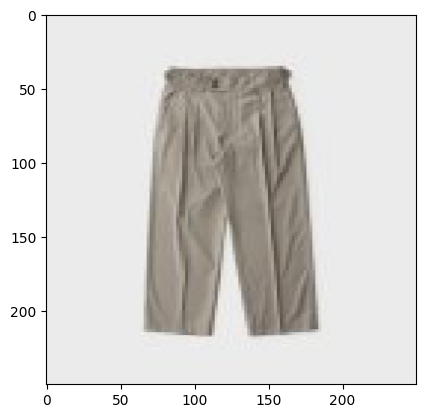

tf.Tensor(b'/content/gdrive/MyDrive/\xe1\x84\x8b\xe1\x85\xb4\xe1\x84\x85\xe1\x85\xb2/\xe1\x84\x87\xe1\x85\xa1\xe1\x84\x8c\xe1\x85\xb5/3875.jpg', shape=(), dtype=string)
b'\xe1\x84\x87\xe1\x85\xa1\xe1\x84\x8c\xe1\x85\xb5'


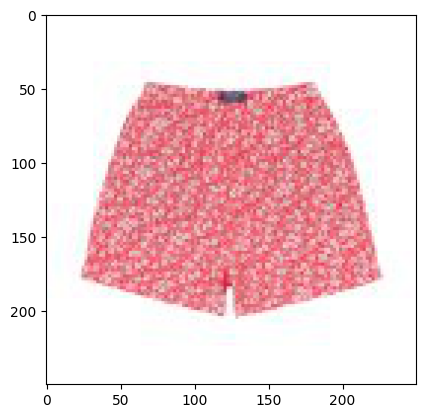

tf.Tensor(b'/content/gdrive/MyDrive/\xe1\x84\x8b\xe1\x85\xb4\xe1\x84\x85\xe1\x85\xb2/\xe1\x84\x89\xe1\x85\xa1\xe1\x86\xbc\xe1\x84\x8b\xe1\x85\xb4/132 (12).jpg', shape=(), dtype=string)
b'\xe1\x84\x89\xe1\x85\xa1\xe1\x86\xbc\xe1\x84\x8b\xe1\x85\xb4'


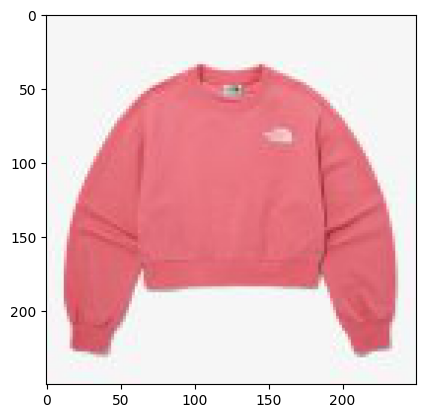

In [9]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

for f in list_ds.take(3):
  print(f)
  img = image.load_img(f.numpy(), target_size=(250, 250))
  label = tf.strings.split(f, os.sep)[-2]
  print(label.numpy())
  plt.imshow(img)
  plt.show()

# 데이터 셋 제작

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8479 files belonging to 4 classes.
Using 6784 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8479 files belonging to 4 classes.
Using 1695 files for validation.


In [12]:
# 클래스 명 확인
class_names = train_ds.class_names
print(class_names)

['바지', '상의', '신발', '아우터']


# 모델링

In [13]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
212/212 [==============================] - 736s 3s/step - loss: 0.7006 - accuracy: 0.7353 - val_loss: 0.5033 - val_accuracy: 0.8059
Epoch 2/10
212/212 [==============================] - 16s 73ms/step - loss: 0.4012 - accuracy: 0.8511 - val_loss: 0.4047 - val_accuracy: 0.8425
Epoch 3/10
212/212 [==============================] - 18s 85ms/step - loss: 0.2959 - accuracy: 0.8897 - val_loss: 0.3520 - val_accuracy: 0.8726
Epoch 4/10
212/212 [==============================] - 16s 72ms/step - loss: 0.2190 - accuracy: 0.9195 - val_loss: 0.3928 - val_accuracy: 0.8773
Epoch 5/10
212/212 [==============================] - 16s 74ms/step - loss: 0.1756 - accuracy: 0.9331 - val_loss: 0.3212 - val_accuracy: 0.8973
Epoch 6/10
212/212 [==============================] - 16s 73ms/step - loss: 0.1334 - accuracy: 0.9474 - val_loss: 0.3586 - val_accuracy: 0.9086
Epoch 7/10
212/212 [==============================] - 16s 72ms/step - loss: 0.1013 - accuracy: 0.9608 - val_loss: 0.3567 - val_accuracy: 